In [1]:
# # This Python 3 environment comes with many helpful analytics libraries installed
# # It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# # For example, here's several helpful packages to load

# import numpy as np # linear algebra
# import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# # Input data files are available in the read-only "../input/" directory
# # For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# # You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# # You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [3]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/spaceship-titanic/sample_submission.csv
/kaggle/input/spaceship-titanic/train.csv
/kaggle/input/spaceship-titanic/test.csv


In [4]:
dataTrain = pd.read_csv('/kaggle/input/spaceship-titanic/train.csv')
dataTest = pd.read_csv('/kaggle/input/spaceship-titanic/test.csv')

<h5 align="center" ><a id='heatmap'><b>Null values heat-map<b></a></h5>

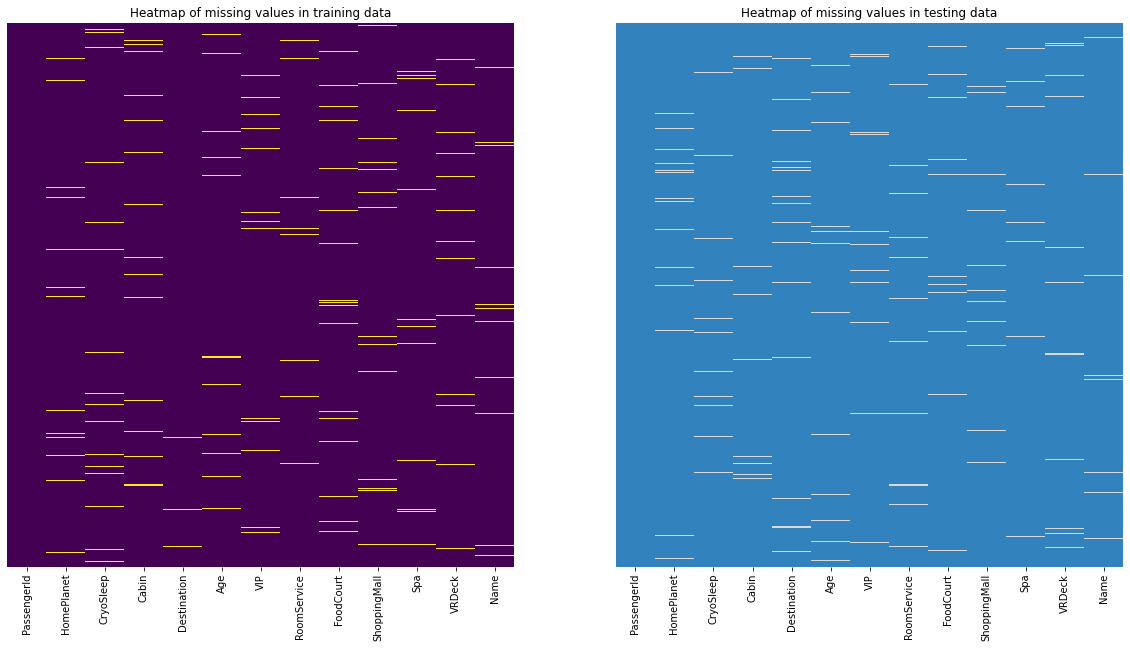

In [5]:
fig, axes = plt.subplots(1, 2, sharex=True, figsize=(20,10))
sns.heatmap(ax=axes[0], yticklabels=False, data=dataTrain.isnull(), cbar=False, cmap="viridis")
sns.heatmap(ax=axes[1], yticklabels=False, data=dataTest.isnull(), cbar=False, cmap="tab20c")
axes[0].set_title('Heatmap of missing values in training data')
axes[1].set_title('Heatmap of missing values in testing data')
plt.show()

In [6]:
print('Unique HomePlanet:', dataTrain.HomePlanet.unique(), '\nUnique Destination:', dataTrain.Destination.unique())

Unique HomePlanet: ['Europa' 'Earth' 'Mars' nan] 
Unique Destination: ['TRAPPIST-1e' 'PSO J318.5-22' '55 Cancri e' nan]


Text(0.5, 1.0, 'Correlation coefficient between different features and Transported')

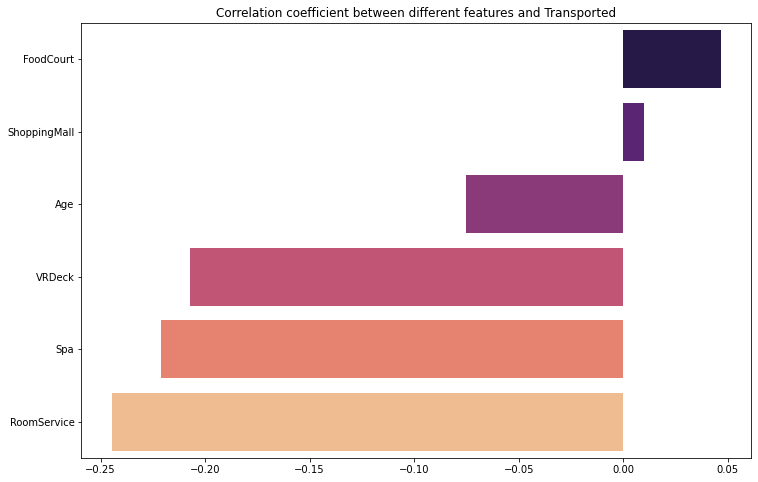

In [7]:
plt.figure(figsize=(12,8))
data = dataTrain.corr()["Transported"].sort_values(ascending=False)
indices = data.index
labels = []
corr = []
for i in range(1, len(indices)):
    labels.append(indices[i])
    corr.append(data[i])
sns.barplot(x=corr, y=labels, palette='magma')
plt.title('Correlation coefficient between different features and Transported')

CORRELATION COEFFICIENT IS B/W -1 TO 1

1 MEANS POSITIVE PERFECT CORR 

-1 MEANS NEGATIVE...

0 MEANS NO CORRELATION

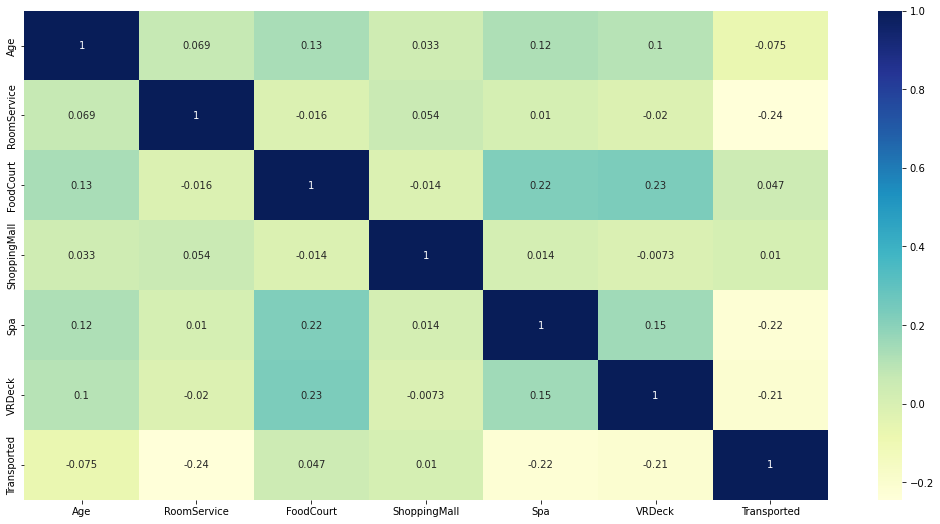

In [8]:
plt.figure(figsize=(18, 9))
sns.heatmap(dataTrain.corr(), cmap="YlGnBu", annot=True)
plt.show()

<h3 align="center" ><a><b>pLANETS of the passengers<b></a></h3>

In [9]:
tPlanet = pd.crosstab(dataTrain['Transported'], dataTrain['HomePlanet'])
tDest = pd.crosstab(dataTrain['Transported'], dataTrain['Destination'])

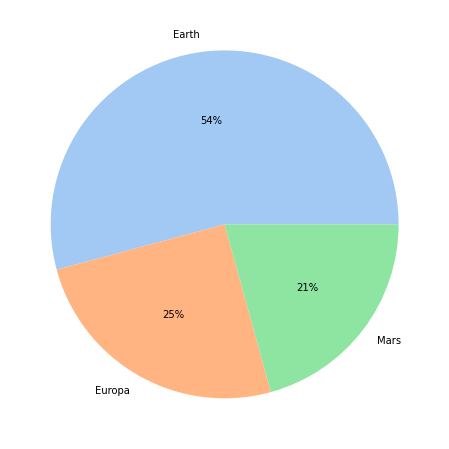

In [10]:
plt.figure(figsize=(12,8))
colors = sns.color_palette('pastel')
plt.pie([item/len(dataTrain.HomePlanet) for item in dataTrain.HomePlanet.value_counts()], labels=['Earth', 'Europa', 'Mars'], colors=colors, autopct='%.0f%%')
plt.show()

<h3 align="center" ><a><b>Distribution of transported individuals<b></a></h3>

Text(0, 0.5, 'Number of passengers')

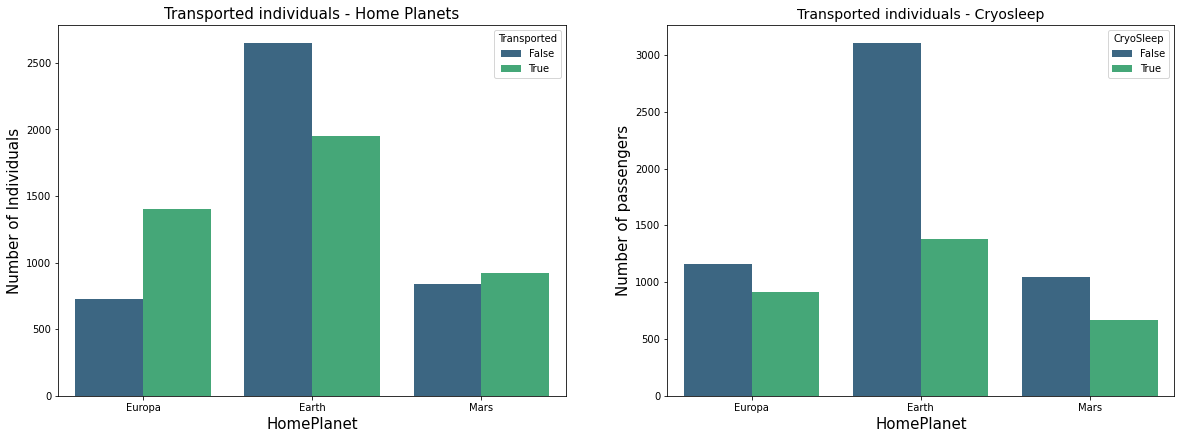

In [11]:
plt.figure(figsize=(20,15))
plt.subplot(2,2,1)
sns.countplot(x = dataTrain.HomePlanet, hue = dataTrain.Transported, palette="viridis")
plt.title('Transported individuals - Home Planets', fontsize=15)
plt.xlabel('HomePlanet', fontsize=15)
plt.ylabel('Number of Individuals', fontsize=15)

plt.subplot(2,2,2)
sns.countplot(x = dataTrain.HomePlanet, hue = dataTrain.CryoSleep, palette="viridis")
plt.title('Transported individuals - Cryosleep', fontsize=14)
plt.xlabel('HomePlanet', fontsize=15)
plt.ylabel('Number of passengers', fontsize=15)

<h3 align="center" ><a><b>Age distribution<b></a></h3>

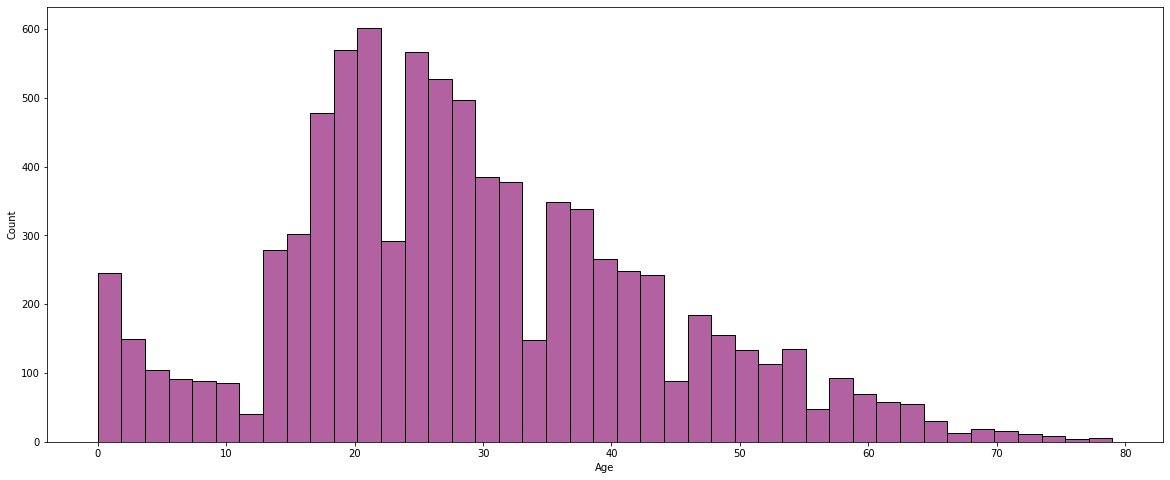

In [12]:
plt.figure(figsize=(20,8))
sns.histplot(dataTrain.Age, color=sns.color_palette('magma')[2])
plt.show()

In [13]:
trainAge = dataTrain.copy()
testAge = dataTest.copy()
trainAge["type"] = "Train"
testAge["type"] = "Test"
ageDf = pd.concat([trainAge, testAge])
fig = px.histogram(data_frame = ageDf, 
                   x="Age",
                   color= "type",
                   color_discrete_sequence =  ['Green','Blue'],
                   marginal="box",
                   nbins= 100,

                )
fig.update_layout(title = "Distribution of Age" , title_x = 0.5)
fig.show()

<h3 align="center" ><a><b>Imputing missing data points (null values)<b></a></h3>

In [14]:
idCol = dataTest.PassengerId.to_numpy()
dataTrain.set_index('PassengerId', inplace=True)
dataTest.set_index('PassengerId', inplace=True)

<b>replaces missing using the most frequent value along each column</b>


In [15]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
#<b>replaces missing using the most frequent value along each column</b>

dataTrain = pd.DataFrame(imputer.fit_transform(dataTrain), columns=dataTrain.columns, index=dataTrain.index)
dataTest = pd.DataFrame(imputer.fit_transform(dataTest), columns=dataTest.columns, index=dataTest.index)
dataTrain = dataTrain.reset_index(drop=True)
dataTest = dataTest.reset_index(drop=True)

<h5 align="center" ><a><b>Typecasting and dropping columns<b></a></h5>

In [16]:
dataTrain.Transported = dataTrain.Transported.astype('int')
dataTrain.VIP = dataTrain.VIP.astype('int')
dataTrain.CryoSleep = dataTrain.CryoSleep.astype('int')
dataTrain.drop(columns=['Cabin', 'Name'], inplace=True)
dataTest.drop(columns=['Cabin', 'Name'], inplace=True)
dataTrain.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,Europa,0,TRAPPIST-1e,39.0,0,0.0,0.0,0.0,0.0,0.0,0
1,Earth,0,TRAPPIST-1e,24.0,0,109.0,9.0,25.0,549.0,44.0,1
2,Europa,0,TRAPPIST-1e,58.0,1,43.0,3576.0,0.0,6715.0,49.0,0
3,Europa,0,TRAPPIST-1e,33.0,0,0.0,1283.0,371.0,3329.0,193.0,0
4,Earth,0,TRAPPIST-1e,16.0,0,303.0,70.0,151.0,565.0,2.0,1


<h3 align="center" ><a><b>Converting categories into numerical entities (Encoding)<b></a></h3>

In [17]:
dataTrain = pd.get_dummies(dataTrain, columns=['HomePlanet', 'CryoSleep', 'Destination'])
dataTest = pd.get_dummies(dataTest, columns=['HomePlanet', 'CryoSleep', 'Destination'])
dataTrain.head()
# gives numbers  0, 1 , 2 , so on on this order

,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,CryoSleep_0,CryoSleep_1,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e
0,39.0,0,0.0,0.0,0.0,0.0,0.0,0,0,1,0,1,0,0,0,1
1,24.0,0,109.0,9.0,25.0,549.0,44.0,1,1,0,0,1,0,0,0,1
2,58.0,1,43.0,3576.0,0.0,6715.0,49.0,0,0,1,0,1,0,0,0,1
3,33.0,0,0.0,1283.0,371.0,3329.0,193.0,0,0,1,0,1,0,0,0,1
4,16.0,0,303.0,70.0,151.0,565.0,2.0,1,1,0,0,1,0,0,0,1


In [18]:
yTrain = dataTrain.pop('Transported').to_numpy()
xTrain = dataTrain.to_numpy()
xTest = dataTest.to_numpy()
xTrain.shape, yTrain.shape, xTest.shape

((8693, 15), (8693,), (4277, 15))

<h3 align="center" ><a><b>Using Random Forest Classifier<b></a></h3>

In [19]:
from sklearn.ensemble import RandomForestClassifier

rfClassifier = RandomForestClassifier()
rfClassifier.fit(xTrain, yTrain)
rfClassifier.score(xTrain, yTrain)

0.9292534222937996

In [20]:
submission = pd.DataFrame(columns=["PassengerId","Transported"])
submission["PassengerId"] = idCol
submission.set_index('PassengerId')
submission["Transported"] = rfClassifier.predict(xTest).astype(bool)
submission

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,False
...,...,...
4272,9266_02,True
4273,9269_01,False
4274,9271_01,True
4275,9273_01,True


In [21]:
submission.to_csv('submission.csv', index=False)
print('Done yayy')

Done yayy


<h1 align="center" ><a><b>Thank You<b></a></h1>